# Проверка гипотез и проведение A/B теста

## ВВЕДЕНИЕ

**Описание проекта:**  

Исследование будет проводиться для крупного интернет-магазина. Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки. В ходе исследования, будет приоритизирована одна из гипотез, а также проведен A/B-тест.  

**Цель проекта:**  
1. Приоритизация гипотезы;
2. Запуск A/B-теста;
3. Анализ результатов.

**План проекта:**
1.  Приоритизация гипотез:
       - В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
       - Применить фреймворк ICE для приоритизации гипотез.
       - Отсортировать их по убыванию приоритета.
       - Применить фреймворк RICE для приоритизации гипотез.
       - Отсортировать их по убыванию приоритета.
       - Сравнить приоритизацию гипотез при применении RICE вместо ICE.
2. Анализ A/B-теста. Результаты  описаны в файлах /datasets/orders.csv и /datasets/visitors.csv. Проанализировать A/B-тест:

    - Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
    - Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
    - Постройть график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.  
    - Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
    - Постройть график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
    - Построить точечный график количества заказов по пользователям. Сделать выводы и предположения. 
    - Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберать границу для определения аномальных пользователей.  
    - Построить точечный график стоимостей заказов. Сделать выводы и предположения.  
    - Посчитать 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
    - Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
    - Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
    - Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
    - Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
    - Принять решение по результатам теста. Варианты решений:
        1. Остановить тест, зафиксировать победу одной из групп.
        2. Остановить тест, зафиксировать отсутствие различий между группами.
        3. Продолжить тест.

## Загрузка данных и импорт библиотек

### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats as stats

### Загрузка таблиц

In [2]:
try:
    hypothesis, orders, visitors = (
        pd.read_csv('hypothesis.csv'),
        pd.read_csv('orders.csv'),
        pd.read_csv('visitors.csv')
    )
except:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv')
    )

## Часть 1. Приоритизация гипотез.

В датафрейме `hypothesis` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`. 

### Вывод всего датафрейма `hypothesis`

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


#### Предобработка данных

In [4]:
hypothesis.columns = [x.lower() for x in hypothesis.columns]

In [5]:
pd.options.display.max_colwidth = None #уберем ограничивающую ширину для столбцов
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Метод ICE для приоритизации гипотез.

In [6]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000


#### Сортировка по убыванию столбца `ICE`

In [7]:
hypothesis_ice = hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE',ascending=False)
hypothesis_ice['ICE'] = hypothesis_ice['ICE'].round(2)
hypothesis_ice

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


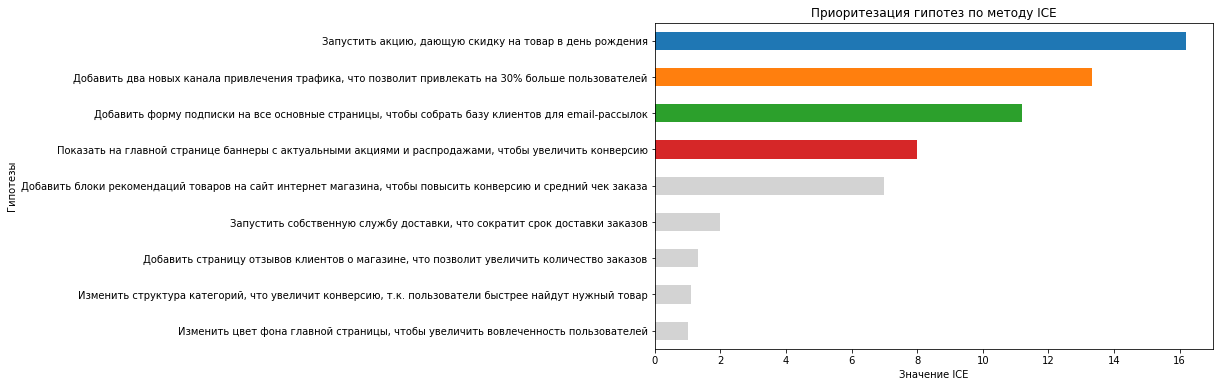

In [8]:
# зададим цвет первым четырем гипотезам
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] + ['#d3d3d3'] * (len(hypothesis_ice) - 4)
# построим график с горизонтальными столбцами
hypothesis_ice.plot(kind='barh', x='hypothesis', y='ICE', color=colors, legend=False, figsize=(10, 6));
plt.xlabel('Значение ICE')
plt.ylabel('Гипотезы')
plt.title('Приоритезация гипотез по методу ICE')
plt.gca().invert_yaxis()  # Инвертируем ось Y для отображения самого высокого значения вверху
# Отображаем график
plt.show()

#### Вывод:

Наиболее перспективные гипотезы по ICE: 
1. Запустить акцию, дающую скидку на товар в день рождения;
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

### Метод RICE для приоритизации гипотез.

In [9]:
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts', 'ICE'], dtype='object')

In [10]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


#### Сортировка по убыванию столбца `RICE`

In [11]:
hypothesis_rice = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE',ascending=False)
hypothesis_rice

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


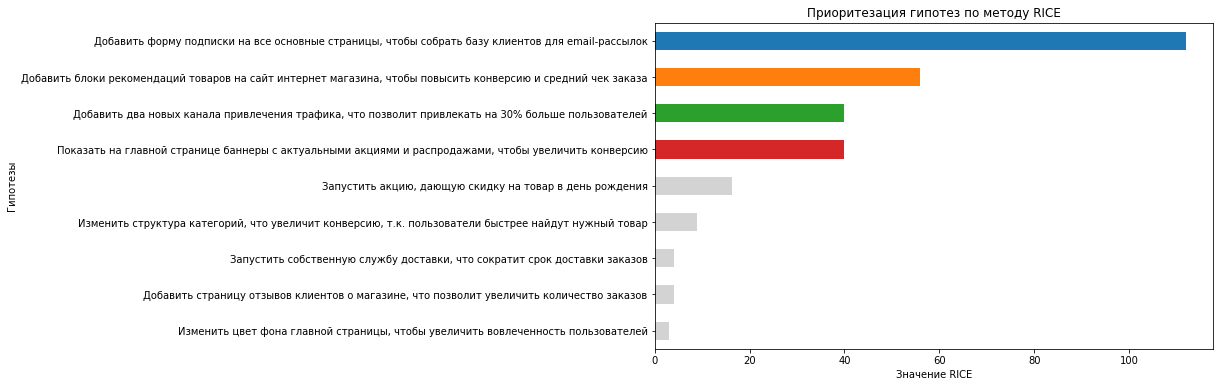

In [12]:
# зададим цвет первым четырем гипотезам
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] + ['#d3d3d3'] * (len(hypothesis_rice) - 4)
# построим график с горизонтальными столбцами
hypothesis_rice.plot(kind='barh', x='hypothesis', y='RICE', color=colors, legend=False, figsize=(10, 6));
plt.xlabel('Значение RICE')
plt.ylabel('Гипотезы')
plt.title('Приоритезация гипотез по методу RICE')
plt.gca().invert_yaxis()  # Инвертируем ось Y для отображения самого высокого значения вверху
# Отображаем график
plt.show()

#### Вывод:

Наиболее перспективные гипотезы по RICE: 
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

### Вывод по приоритезации гипотезы

In [13]:
# вывод 4-х гипотез с большим коэффициентом ICE
hypothesis_ice['hypothesis'].head(4)

8                                                 Запустить акцию, дающую скидку на товар в день рождения
0      Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
7        Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
6    Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
Name: hypothesis, dtype: object

In [14]:
# вывод 4-х гипотез с большим коэффициентом RICE
hypothesis_rice['hypothesis'].head(4)

7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
Name: hypothesis, dtype: object


  
**ВЫВОД:**    

Для приоритизации гипотез были использованы два метода — **ICE** и **RICE**. 

**Результаты применения метода ICE:**

1. Номер 8 — Запустить акцию, дающую скидку на товар в день рождения;
2. Номер 0 — Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
3. Номер 7 — Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
4. Номер 6 — Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

**Результаты применения метода RICE:**

1. Номер 7 — Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
2. Номер 2 — Добавить блоки рекомендаций товаров на сайт интернет-магазина, чтобы повысить конверсию и средний чек заказа;
3. Номер 0 — Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
4. Номер 6 — Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

**Основные выводы:**

- Гипотеза номер 6 имеет наименьший приоритет в обоих методах.
- Гипотезы номер 0 и 7 присутствуют в приоритетных гипотезах обоих методов. Однако в методе **ICE** гипотеза номер 7 занимает третье место, а 0 — второе. В методе **RICE** гипотеза номер 7 на первом месте, а 0 — на третьем.
- Самая приоритетная гипотеза в методе **ICE** — это гипотеза номер 8 (*Запустить акцию, дающую скидку на товар в день рождения*).
- Самая приоритетная гипотеза в методе **RICE** — гипотеза номер 7 (*Добавить форму подписки на все основные страницы для сбора базы клиентов для email-рассылок*).
- Гипотеза номер 8 присутствует только в результатах метода **ICE**, в то время как гипотеза номер 2 — только в результате применения метода **RICE**.

**Заключение:**

Разница между методами заключается в добавлении параметра **Reach** в метод **RICE**, который учитывает охват пользователей, что важно при разработке новых продуктов или функционалов для широкой аудитории. В то время как метод **ICE** ориентирован больше на простоту реализации, что полезно для оптимизации существующих функций и решения текущих проблем.

## Часть 2. Анализ A/B-теста.

Проведен A/B-тест. Результаты A/B-теста описаны в датафреймах orders и visitors.

### Знакомство с данными

In [15]:
#функция для предобработки датафреймов
def prepare_data(df):
    display("Вывод первых пяти строк датафрейма:", df.head())
    print()
    display("Вывод общей информации:")
    display(df.info())
    print()
    display("Описание датафрейма:")
    display(df.describe())
    #проверка на полные дубликаты
    print('Количество полных дубликатов в датафрейме:', df.duplicated().sum())
    print()
    df['date'] = pd.to_datetime(df['date'])
    display("Вывод общей информации после преобразования столбца date в тип datetime:")
    display(df.info())
    print()
    display("Вывод информации об уникальных значениях столбца 'group':")
    display(df['group'].unique())
    display("Даты начала и конца теста:")
    display(df['date'].min(), df['date'].max())

In [16]:
prepare_data(orders)

'Вывод первых пяти строк датафрейма:'

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


'Вывод общей информации:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

'Описание датафрейма:'

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


Количество полных дубликатов в датафрейме: 0



'Вывод общей информации после преобразования столбца date в тип datetime:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

"Вывод информации об уникальных значениях столбца 'group':"

array(['B', 'A'], dtype=object)

'Даты начала и конца теста:'

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [17]:
prepare_data(visitors)

'Вывод первых пяти строк датафрейма:'

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


'Вывод общей информации:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

'Описание датафрейма:'

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Количество полных дубликатов в датафрейме: 0



'Вывод общей информации после преобразования столбца date в тип datetime:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

"Вывод информации об уникальных значениях столбца 'group':"

array(['A', 'B'], dtype=object)

'Даты начала и конца теста:'

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

##### Анализ информации о группах с пользователями

In [18]:
orders.groupby('group').agg({'visitorId': 'nunique'}).reset_index()

,group,visitorId
0,A,503
1,B,586


In [19]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

В обоих датафреймах количество уникальных групп равна двум.

In [20]:
# Создадим два датафрейма для групп A и B с уникальными значениями id пользователей
group_a_visitors = set(orders[orders['group'] == 'A']['visitorId'].unique())
group_b_visitors = set(orders[orders['group'] == 'B']['visitorId'].unique())

# Найдем пересечение
overlap_count = len(group_a_visitors & group_b_visitors)

# Найдем общее количество уникальных пользователей
total_unique_visitors = len(group_a_visitors | group_b_visitors)

# Рассчитаем вероятность
probability_both_groups = overlap_count / total_unique_visitors
probability_both_groups

0.05625606207565471

Вероятность попадания пользователей в обе группы равна 5.6%.

##### Вывод:  
В ходе предобработки датафреймов `orders` и `visitors` не были найдены нулевые значения, а также не найдены полные дубликаты. Также:  
1. Выведены общая информация о датафреймах и описание данных в каждом из датафреймов.
2. Преобразован столбец `date` в тип datetime.
3. Выведены даты начала и конца теста. В обоих датафреймах эти даты совпадают
4. Посчитано количество уникальных групп. Это группы A и B.
5. Найдена вероятность попадания пользователей в обе группы и составляет 5.6%.

### Анализ A/B-теста

#### Построение графика кумулятивной выручки по группам.

1) Создадим датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders. Избавимся от дубликатов методом drop_duplicates().

In [21]:
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


2. Объявим переменную ordersAggregated, содержащую:
- дату;
- группу A/B-теста;
- число уникальных заказов в группе теста по указанную дату включительно;
- число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
суммарную выручку заказов в группе теста по указанную дату включительно.

In [22]:
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                           orders['group'] == x['group'])]\
                    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 
                          'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'])) 
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


3. Объявим переменную visitorsAggregated, содержащую:
- дату;
- группу A/B-теста;
- количество уникальных посетителей в группе теста по указанную дату включительно.

In [23]:
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                               visitors['group'] == x['group'])]
                        .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group']))
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


5. Определим переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' методом merge()

In [24]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.head()

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


6. Присвойте столбцам cumulativeData названия ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [25]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


7. Объявим переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраним данные о датах, выручке и числе заказов в группах A и B.

In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


In [27]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
cumulativeRevenueB.head()

,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


8. Графики кумулятивной выручки по дням по группам

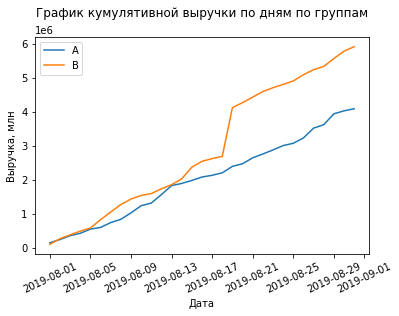

In [28]:
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A');

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B');
plt.xticks(rotation=25)
plt.legend();
plt.xlabel('Дата')
plt.ylabel('Выручка, млн')
plt.title('График кумулятивной выручки по дням по группам', pad=20);

##### Вывод

Построен график кумулятивной выручки по группам. На графике видно, что выручка равномерно увеличивается вначале теста, а в середине теста сегмент B вырвался вперёд и продолжал лидировать весь остаток теста. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.Скорее всего на различие влиют выбросы, то есть аномально большие значения. Влияние аномально маленьких значений небольшое, поэтому на результаты они практически не могут повлиять.

#### Построение графика кумулятивного среднего чека по группам

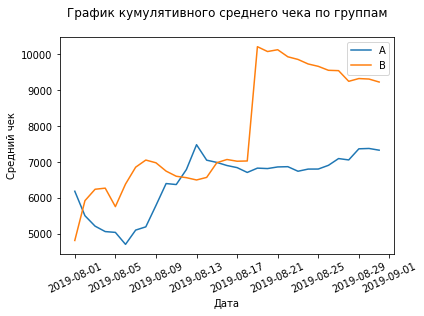

In [29]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A');
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B');
plt.xticks(rotation=25)
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам', pad=20);

##### Вывод

По результатам построенного графика, видно, что кумулятивное значение среднего чека сегмента B превышает сегмент A. Это может говорить о том, что к концу теста в группу B попали большие суммы заказов. Требуется дополнительный анализ выбросов, так как по центральной предельной теореме значение кумулятивных метрик часто сходится и устанавливается около некоторого среднего, а на графике явно видны различия.

#### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

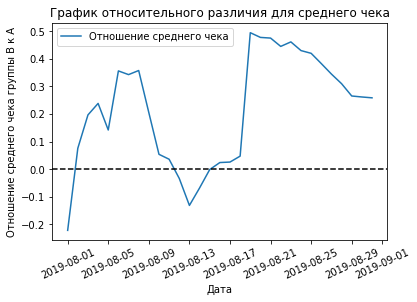

In [30]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = (cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                    left_on='date', 
                                                    right_on='date', 
                                                    how='left', 
                                                    suffixes=['A', 'B'])
                          )

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1,
         label='Отношение среднего чека');

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');
plt.xticks(rotation=25)
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Отношение среднего чека группы B к А')
plt.title('График относительного различия для среднего чека');

##### Вывод

Построенный график отношения кумулятивного среднего чека группы B к кумулятивному среднему чеку группы А показывает, что результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы.

#### Построение графика кумулятивного среднего количества заказов на посетителя по группам

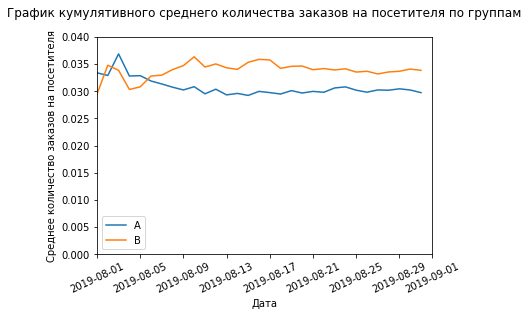

In [31]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend();
plt.xticks(rotation=25)
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам', pad=20);
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.040]);

##### Вывод

В начале теста сегмент A имел большее кумулятивное среднее количество заказов, но постепенно сегмент B выровнялся и зафиксировался примерно около одного значения, больше значения сегмента A, но значение этой группы тоже зафиксировалось.
Абсолютное значение колебания в начале и в конце теста не слишком большое: от 3% до 4%.

#### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

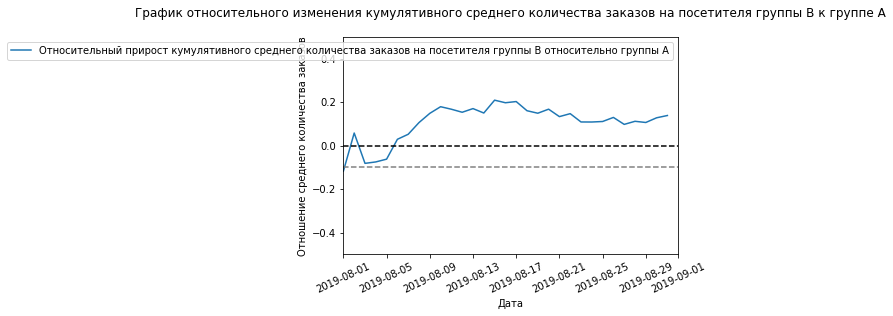

In [32]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xticks(rotation=25)
plt.xlabel('Дата')
plt.ylabel('Отношение среднего количества заказов')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', pad=20);
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.5, 0.5]);

##### Вывод

В начале теста среднее количество заказов на посетителя для группы B колебалась, но уже через неделю группа B начала лидировать по метрике: становится лучше и лучше, либо зафиксировалась около прироста в 15% относительно группы A.
В целом отношение среднего количества заказов на посетителя ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя.

#### Построение точечного графика количества заказов по пользователям.

1. Создадим датафрейм c двумя столбцами: 'userId' и 'orders'. Назовем его ordersByUsers. Отсортируем по убыванию количества заказов пользователей и выведем на экран первые 40 строк.

In [33]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']
ordersByUsers = ordersByUsers.sort_values(by='orders', ascending=False)
ordersByUsers.head(40)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


2. Построим диаграмму методом scatter()

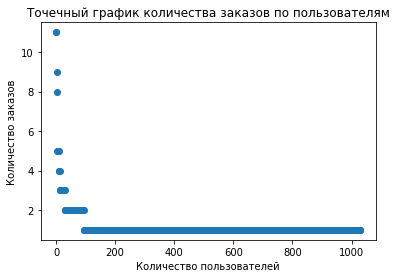

In [34]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.title('Точечный график количества заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders']); 

##### Вывод

Пользователей, заказавших более двух раз, совсем мало. Их точная доля не ясна — непонятно, считать их аномалиями или нет.  

#### Подсчет 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей

In [35]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

##### Вывод

Не более 5% пользователей оформляли больше двух заказов. И не более 1% пользователей — больше четырех заказов. И 10% пользователей заказывали более одного раза.   
Примем за аномальных пользователей тех, кто совершил от 2 заказов.

#### Построение точечного графика стоимостей заказов

In [36]:
orders.sort_values(by='revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


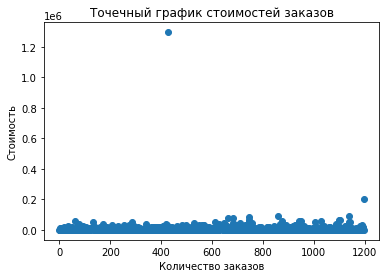

In [37]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость')
plt.title('Точечный график стоимостей заказов')
plt.scatter(x_values, orders['revenue']);

##### Вывод

Заказов стоимостью 100 000 рублей мало. Есть выбросы в районе 200 000 — 300 000 рублей и в районе 1 200 000 рублей. Нужно найти выборочные перцентили.

#### Подсчет 95-й и 99-й перцентили стоимости заказов. Выбор границы для определения аномальных пользователей

In [38]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

##### Вывод

Не более, чем у 5% заказов чек дороже 28 000 рублей. И не больше, чем у 1% заказов — дороже 58233.2 рублей. И 10% заказов — дороже 18168 рублей.  
Примем за аномальных пользователей тех, кто совершил заказ дороже 20 000 рублей.

#### Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Нулевая гипотеза: различий в среднем количестве заказов между группами нет.   
Альтернативная гипотеза: различия в среднем между группами есть

1.  Создадим датафрейм `data`, который будет содержать столбцы с различными показателями на каждую дату для каждой группы, чтобы анализировать данные по группам в сравнении.

In [39]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head(10)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935
6,2019-08-07,18,142417,24,225334,145,740818,153,1049671,644,709,4629,4644
7,2019-08-08,16,96279,27,220918,161,837097,180,1270589,610,654,5239,5298
8,2019-08-09,16,188506,25,160812,177,1025603,205,1431401,617,610,5856,5908
9,2019-08-10,16,210495,23,107802,193,1236098,228,1539203,406,369,6262,6277


2. Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'], где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов. 

In [40]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersA.head()

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [41]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']
ordersByUsersB.head()

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


3. Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули.

##### Функция для создания датафрейма, в котором пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули.

In [42]:
def sample(col, df):
    return pd.concat(
    [ordersByUsersA['orders'],pd.Series(0,index=np.arange(
                data[col].sum() - len(df['orders'])),name='orders',),
    ],axis=0,
)

In [43]:
sampleA = sample('visitorsPerDateA', ordersByUsersA) 
sampleA.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [44]:
sampleB = sample('visitorsPerDateB', ordersByUsersB) 
sampleB.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

4. Посчитаем статистическую значимость различия среднего количества заказов по результатам теста. Применим тест Манна-Уитни. 

In [45]:
'p-value: '"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])

'p-value: 0.93385'

In [46]:

'Относительный прирост среднего количества заказов группы B: '"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)

'Относительный прирост среднего количества заказов группы B: -0.005'

##### Вывод:

P-value больше 0.05, потому нулевую гипотезу не отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами нет статистически значимых различий. Относительный проигрыш группы B равен 0.5% 

#### Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза: различий в среднем чеке между группами нет.  
Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [47]:
('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                     orders[orders['group']=='B']['revenue'])[1]))


'0.729'

In [48]:
'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

'0.259'

##### Вывод:

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Относительный прирост среднего чека группы B составляет 25.9%. Скорее всего такое различие вызвано аномальными значениям. В следующем пункте проведем анализ на 'очищенных' данных.

#### Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

В пунктах `4.2.8` и `4.2.9` приняли за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 20 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. 

1. Сделаем срезы пользователей с числом заказов больше или равен 2

In [49]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] >= 2]['userId'],
    ],
    axis=0,
)
len(usersWithManyOrders)

64

2. Сделаем срезы пользователей, совершивших заказы дороже 20 000

In [50]:
usersWithExpensiveOrders = orders[orders['revenue'] > 20000]['visitorId']
len(usersWithExpensiveOrders)

93

3. Объединим их в таблице abnormalUsers, удалим дубликаты, отсортируем по возрастанию. 

In [51]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head()

568     113298937
1099    148427295
461     154576532
18      199603092
928     204675465
dtype: int64

4. Создадим переменные sampleAFiltered и sampleBFiltered, в которых сохраним очищенные данные о заказах — не включая аномальных пользователей. 

##### Создадим функция, которая будет возвращать очищенные данные о заказах

In [52]:
def clear_data(df, col):
    return pd.concat(
    [
        df[
            np.logical_not(df['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data[col].sum() - len(df['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [53]:
sampleAFiltered = clear_data(ordersByUsersA, 'visitorsPerDateA')
sampleAFiltered.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [54]:
sampleBFiltered = clear_data(ordersByUsersB, 'visitorsPerDateB')
sampleBFiltered.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

5. Выведем p-value для сравнения среднего между очищенными группами.

In [55]:
'{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])

'0.02198'

6. Выведем  относительный прирост среднего очищенной группы B.

In [56]:
'{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'0.161'

##### Вывод:

P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «очищенных данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост группы B равен 16.1%. Результаты по очищенным данным отличаются от результатов анализа сделанных на основе сырых данных.

#### Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

1. Выведем p-value для сравнения средних чеков между очищенными группами

In [57]:
'{0:.3f}'.format(stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )

'0.773'

2. Выведем относительный прирост среднего чека очищенной группы B

In [58]:
"{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )

'-0.023'

##### Вывод:

P-value больше 0.05, потому нулевую гипотезу не отвергаем. Анализ «очищенных данных» сообщает, что в среднем количестве заказов между группами нет статистически значимых различий как и у результата анализа по сырым данным. Относительный проигрыш группы B равен 2.3%, что отличается от данных полученных при анализе по сырым данным. Значит, удаление аномальных значений значительно снизило шум, искажающий результаты анализа.

### Вывод:

Имеющиеся факты:  
1. Статистически значимое различие по среднему количеству заказов между группами по «сырым» данным нет, однако по данным после фильтрации аномалий статистически значимое различие присутствует;
2. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
3. График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A и есть тенденция, что среднего количества заказов между группами будет и дальше положительным:
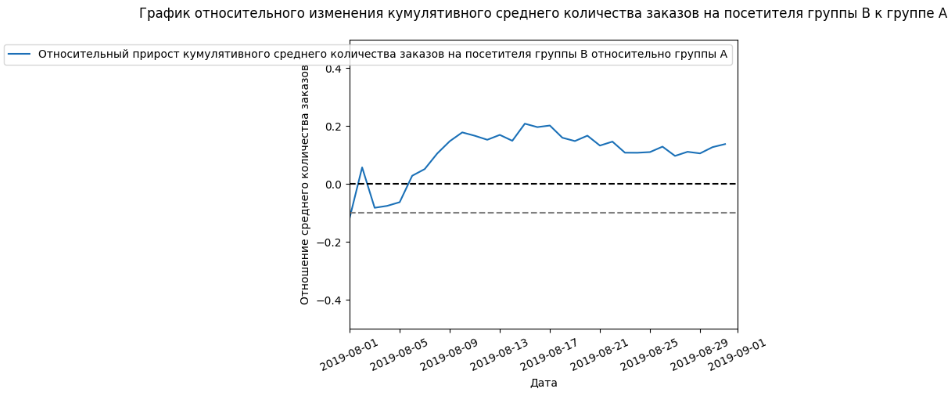
4. График различия среднего чека говорит о том, что результаты группы B колеблются, но в больший период времени имеют положительную тенденцию роста и сейчас почти на 25% лучше:
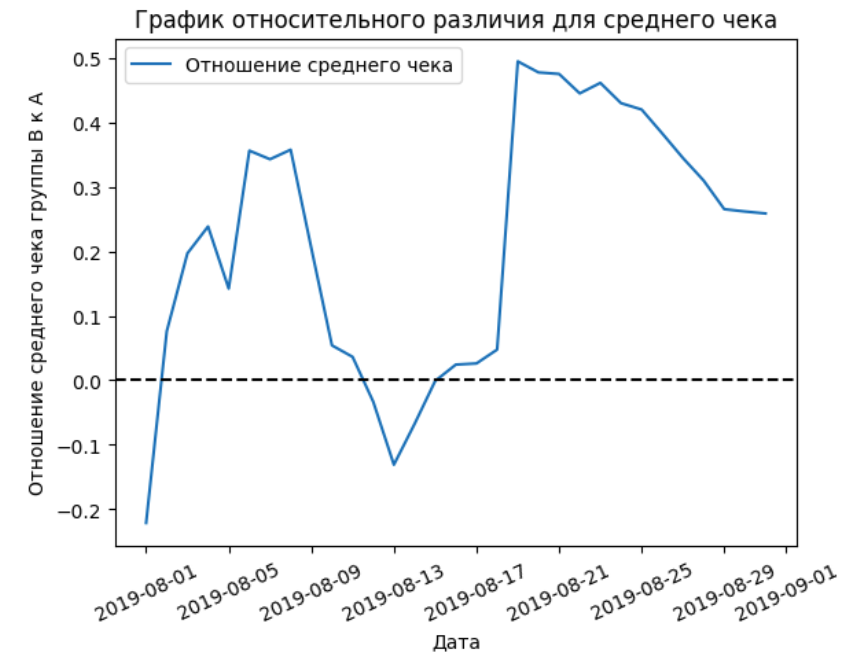
**Итог:**
Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Графики показывают, что группа B демонстрирует положительные результаты, и имеет потенциал дальнейшего роста. Также по ключевому показателю (количеству заказов) группа B демонстрирует статистически значимое превосходство. Стабильный положительный тренд по количеству заказов подтверждается и после фильтрации аномалий. Есть значительная вероятность, что при имеющихся данных сегмент B на самом деле лучше сегмента A.

## Общий вывод:  
На основании проведенного анализа гипотез и результатов A/B-теста можно сделать следующие общие выводы:

1. **Приоритизация гипотез**: Методы ICE и RICE показали различные приоритеты для гипотез. Гипотеза №7 (добавление формы подписки) вышла на первое место в приоритете по RICE. При этом гипотеза №8 (скидка на день рождения) показала высокий приоритет в ICE, что предполагает её эффективность с учетом простоты реализации. Эти различия обусловлены особенностями методов: ICE акцентируется на быстрой и более легкой реализации, тогда как RICE используется для более сложных реализаций.

2. **Анализ A/B-теста**:
   - Кумулятивный график выручки показал, что группа B демонстрирует стабильный рост выручки относительно группы A, особенно к концу теста. 
   - Графики кумулятивного среднего чека и среднего количества заказов на посетителя указывают на позитивные тренды для группы B, где среднее количество заказов и средний чек выше, чем у группы A.
   - Аномалии выявлены на уровне пользователей с более чем двумя заказами и заказов с чеками выше 20 000 рублей, что привело к значительным расхождениям между результатами на «сырых» и очищенных данных.

3. **Статистическая значимость**:
   - Среднее количество заказов в группе B оказалось статистически значимо выше после фильтрации аномалий, что подтверждает конкурентное преимущество этой группы.
   - По среднему чеку различий между группами не было выявлено ни до, ни после фильтрации, что говорит о схожем распределении стоимости заказов в обеих группах.

**Итог:**  
Анализ подтверждает, что группа B демонстрирует устойчивый рост среднего количества заказов и выручки, и эти положительные различия сохраняются после удаления аномальных значений. Данные указывают на статистически значимое преимущество группы B в количестве заказов, что позволяет считать её лучшей группой. Тест рекомендуется завершить и признать успешным, зафиксировав преимущество группы B.
